# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# read the data (using Google Colab so will need to import differently than Jupyter)
# df = pd.read_csv('foodhub_order.csv') - would use this format in Jupyter

# First mount Google Drive to bring in our data file
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# now read in the data set with the file path
df = pd.read_csv('/content/drive/MyDrive/Applied Data Science MIT/Foundations/foodhub_order.csv')
# # returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Finding the shape of the dataframe gives us the count of rows and columns in the dataframe
df.shape

(1898, 9)

#### Observations: There are 1898 rows (or observations) and 9 columns in the dataframe.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are both numerical and text data types in the data frame. With numerical values consiting of integers for the following columns:
  -  order_id (integer)
  - customer_id (integer)
  -  food_preperation_time(integer)
  -  delievery_time  (integer)
  - cost_of_order (float/decimal)
  
The text columns are
  - restaurant name
  - cusine_type
  - day_of_the_week
  - rating.

We likely want rating to be a numerical value so we will want to look further into this.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:

df.isna().sum(axis=0) #provides a count of null values for each column


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations: There are no null values in our dataset.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T # provide statistical summary for numerical datatypes and transposes it to a more readable output

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
# can also print each value
average_prep_time = df['food_preparation_time'].mean()
print('The average food preparation time is', round(average_prep_time,2) )
min_prep_time = df['food_preparation_time'].min()
print('The minimum food preparation time is', round(min_prep_time,2))
max_prep_time = df['food_preparation_time'].max()
print('The maximum food preparation time is', round(max_prep_time,2))

The average food preparation time is 27.37
The minimum food preparation time is 20
The maximum food preparation time is 35


#### Observations:  
- The minimum food preparation time is 20 minutes.
- The maximum food preparation time is 35 minutes.
- The average food preparation time is 27 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# first explore the ratings column, we know there are no NaN values but the object data type tells us there is text values in some rows
df['rating'].value_counts()


Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: There are 736 "Not given" values (or not rated) in the rating column.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df.columns #getting column names to find which variables to explore.

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')

In [ ]:
#starting with categorical variable
df.describe(exclude = 'number').T # statistical info for each categorical variable

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


Looking at the categorical variables there are 4 unqiue values for ratings, 2 unique values for day_of_the_week (weekend or weekday), 14 unique values for cuisine_type and 178 values for restaurant.

<Axes: xlabel='day_of_the_week', ylabel='count'>

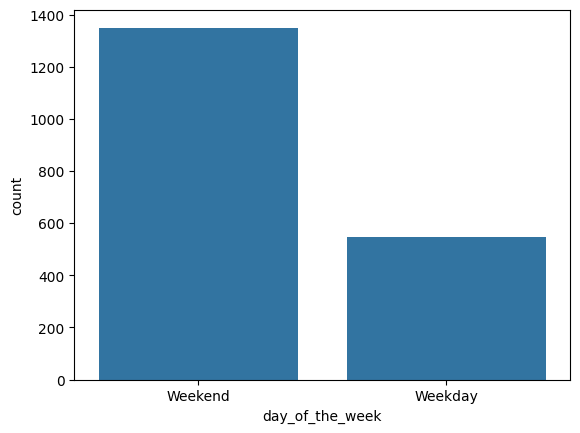

In [ ]:
sns.countplot(data=df, x = 'day_of_the_week') # frequency bar chart for day of the week

In [ ]:
df['day_of_the_week'].value_counts(normalize=True) #percent of each value

Weekend    0.711802
Weekday    0.288198
Name: day_of_the_week, dtype: float64

The majority (71%) of orders in our dataset were placed on the weekend.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Korean'),
  Text(1, 0, 'Japanese'),
  Text(2, 0, 'Mexican'),
  Text(3, 0, 'American'),
  Text(4, 0, 'Indian'),
  Text(5, 0, 'Italian'),
  Text(6, 0, 'Mediterranean'),
  Text(7, 0, 'Chinese'),
  Text(8, 0, 'Middle Eastern'),
  Text(9, 0, 'Thai'),
  Text(10, 0, 'Southern'),
  Text(11, 0, 'French'),
  Text(12, 0, 'Spanish'),
  Text(13, 0, 'Vietnamese')])

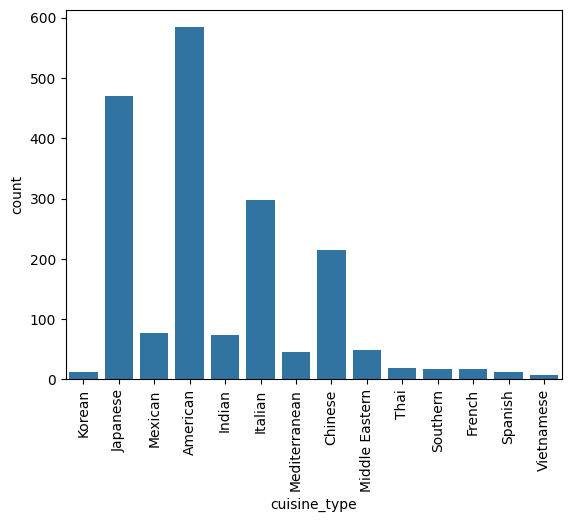

In [ ]:
sns.countplot(data=df, x = 'cuisine_type') # frequency bar chart for cusine type
plt.xticks(rotation=90) #rotate labels for readability

In [ ]:
df['cuisine_type'].value_counts(normalize=True) #percent of each value

American          0.307692
Japanese          0.247629
Italian           0.157007
Chinese           0.113277
Mexican           0.040569
Indian            0.038462
Middle Eastern    0.025817
Mediterranean     0.024236
Thai              0.010011
French            0.009484
Southern          0.008957
Korean            0.006849
Spanish           0.006322
Vietnamese        0.003688
Name: cuisine_type, dtype: float64

American (30%), Japanese (25%), Italian (16%) and Chinese (11)are the most popular cuisines types ordered (in that order). Together these 4 cuisines make up over 80% of all orders. There may be more restaurants in these cuisine types in our data set than in other cuisine types, making it more likely for these types to be available to order.

<Axes: xlabel='rating', ylabel='count'>

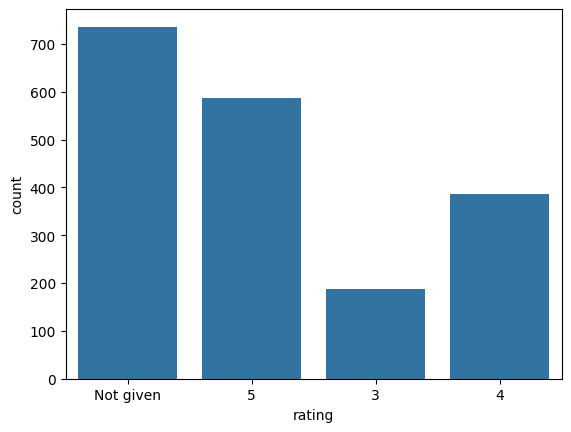

In [ ]:
sns.countplot(data=df, x = 'rating') # frequency bar chart for rating

In [ ]:
df['rating'].value_counts(normalize=True) #percent of each value

Not given    0.387777
5            0.309800
4            0.203372
3            0.099052
Name: rating, dtype: float64

In [ ]:
df['rating'].value_counts() # value count

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

In [ ]:
#return the sum of rows with 4 or 5 ratings and divide by rows where a rating was given to get % of rated orders that are 4 or 5
((df['rating'] == '4').sum()  +  (df['rating'] == '5').sum() ) / (df.shape[0] - (df['rating'] == 'Not given').sum())


0.8382099827882961

Many orders do not get rated (39%). When orders are rated they tend to have high ratings of 4 or 5  - about 84% of those with ratings are rated 4 or 5. Overall 10% of orders were rated 3.

In [ ]:
df['restaurant_name'].nunique()

178

In [ ]:
#because there are 178 restaurants in our dataset we won't plot them all but instead look at the more frequent
df['restaurant_name'].value_counts(normalize= True) # value count

Shake Shack                  0.115385
The Meatball Shop            0.069547
Blue Ribbon Sushi            0.062698
Blue Ribbon Fried Chicken    0.050580
Parm                         0.035827
                               ...   
Sushi Choshi                 0.000527
Dos Caminos Soho             0.000527
La Follia                    0.000527
Philippe Chow                0.000527
'wichcraft                   0.000527
Name: restaurant_name, Length: 178, dtype: float64

In [ ]:
# Get value counts for each restaurant
value_counts = df['restaurant_name'].value_counts()

# return top 10 most frequent
top_10_values = value_counts.nlargest(10)

print(top_10_values)

Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64


In [ ]:
top_10_values.sum()/df.shape[0] *100 # percent of dataset were orders from the top 10 most ordered restaurants

46.73340358271865

Shake Shack is the restuarant with the most orders (12% of all orders).  The top 10 restaurants with the most orders make up 47% of the database. There is alot of variability in restaurant name.

In [ ]:
#moving onto our numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
#how many unique orders?
df['order_id'].nunique()

1898

In [ ]:
#how many unique customers
df['customer_id'].nunique()

1200

There are 1200 unique customers with 1898 total orders in our dataset.

<Axes: ylabel='cost_of_the_order'>

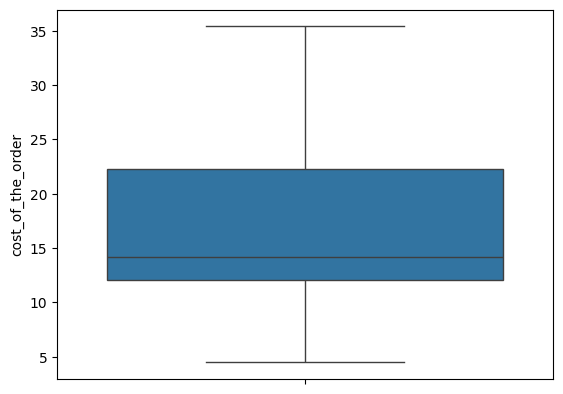

In [ ]:
sns.boxplot(data= df, y = 'cost_of_the_order')  #boxplot of cost of order

<Axes: xlabel='cost_of_the_order', ylabel='Count'>

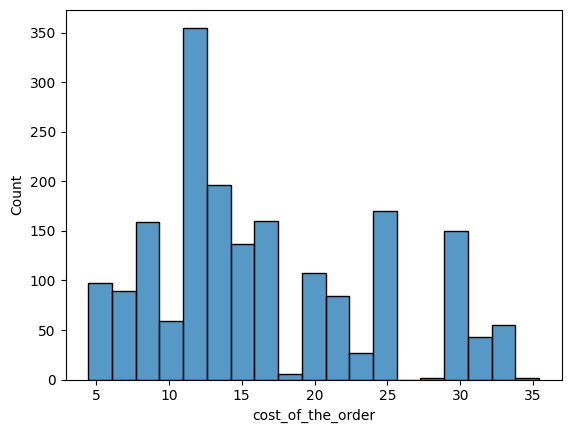

In [ ]:
sns.histplot(data = df, x = 'cost_of_the_order') #histogram of cost of order

In [ ]:
df['cost_of_the_order'].mean()

16.498851422550054

We see there are no outliers in our data for the cost of the order. The minimum cost is around 5 and the maximum cost is about 35, with the average cost at 16.50. The histogram shows us that the data is bimodal for cost and perhaps is somewhat right skewed. The median is $14.14. 75% of the costs are below 22.  Cost of the order could be impacted by the number of items ordered. This may be a good data point to consider collecting.

<Axes: ylabel='food_preparation_time'>

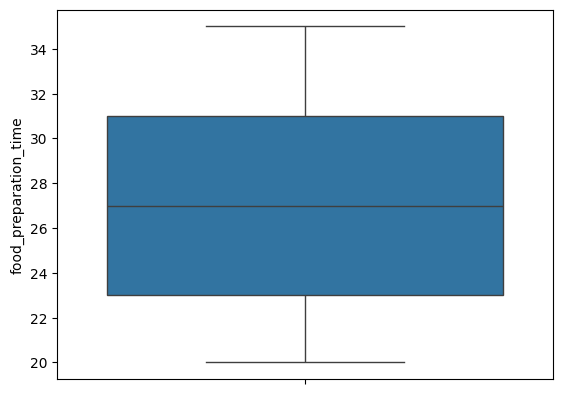

In [ ]:
sns.boxplot(data= df, y = 'food_preparation_time')  #boxplot of food prep time

<Axes: xlabel='food_preparation_time', ylabel='Count'>

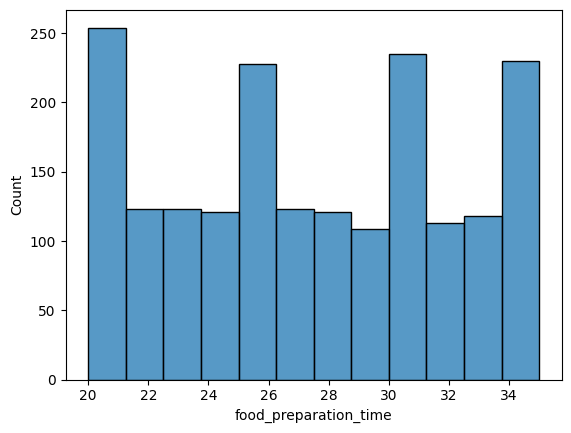

In [ ]:
sns.histplot(data= df, x = 'food_preparation_time')  #histogram of food prep time

There are no outliers in our dataset for the food prep time. Prep times range from 20 to 35 minutes, 27 minutes on average. Orders with 20, 25, 30 or 35 minute prep times occur more frequently than others. 75% of orders have prep times before 31 minutes.

<Axes: ylabel='delivery_time'>

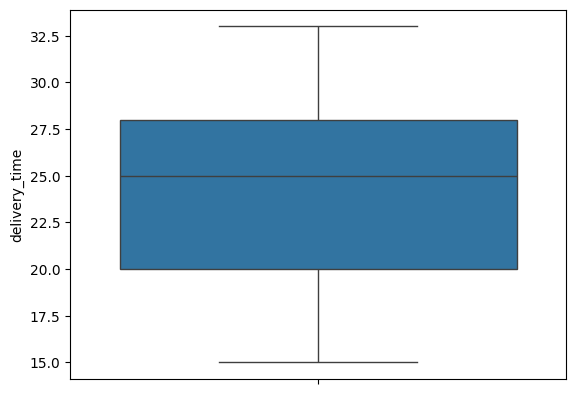

In [ ]:
sns.boxplot(data= df, y = 'delivery_time')  #boxplot of delivery time

<Axes: xlabel='delivery_time', ylabel='Count'>

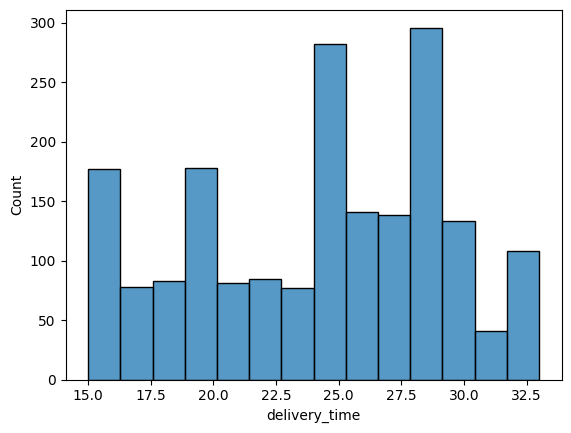

In [ ]:
sns.histplot(data= df, x = 'delivery_time')  #histogram of delivery time

In [ ]:
df['delivery_time'].skew()

-0.23653630513419896

There are no outliers in our dataset for delivery time. Delivery times range from 15 to 33 minutes. The average delivery time is 24 minutes. The histogram shows the data is slightly skewed left. Delivery time may be impacted by the distance from the restaurant to the delivery address, traffic, time of day, weather, type of vehicle (car versus bike/scooter) and other external factors.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Get value counts for each restaurant
value_counts = df['restaurant_name'].value_counts()

# return top 10 most frequent
top_5_values = value_counts.nlargest(5)

print(top_5_values)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


#### Observations: The top 5 restaurants based on orders received are:
- Shake Shack
- The Meatball Shop
- Blue Rubbon Sushi
- Blue Ribbon Fried Chicken
- Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#first create a dataframe of orders that occurred on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
#next count the values for the cuisine types in the weekend dataframe
df_weekend['cuisine_type'].value_counts()


American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: The most popular cuisine ordered on weekends in American. This is also the case for the entire dataset with weekdays included.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
df.shape

(1898, 9)

In [ ]:
(df['cost_of_the_order'] > 20).sum() / df.shape[0] *100
 # count of values where cost of order is greater than 20 divided by row count

29.24130663856691

#### Observations: About 29% of orders in our dataset cost more than 20 dollars.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
df['delivery_time'].mean(0)

24.161749209694417

#### Observations: The average (or mean) delivery time is about 24 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Get value counts for each customer
value_counts = df['customer_id'].value_counts()

# return top 3 most frequent customers
top_3_values = value_counts.nlargest(3)

print(top_3_values)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
The top three most frequent customers are as follows
- customer 52832 with 13 orders
- customer 47440 with 10 orders
- customer 83287 with 9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [ ]:
# look at correlations for numerical values
df.corr().T

<ipython-input-124-8b6d004e38ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().T


,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


There are no significant correlations between our numerical values.

Let's look at how some of out numericaland categorical values look. Things we will consider:

- Are ratings impacted by the cost?
- Are ratings impacted by the time it takes to receive the order?
- Are some cuinines more expensive than others (this could be impacted by number of items in the order but we do not have this data point)?
- Does the day of the week impact delivery time?
- Does the cuisine impact the preparation time?


<Axes: xlabel='rating', ylabel='cost_of_the_order'>

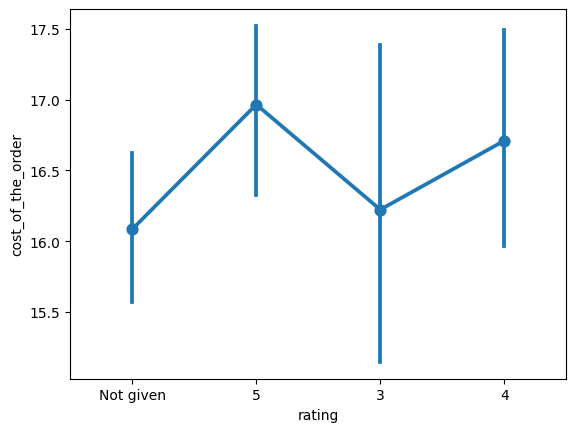

In [ ]:
#pointplot for ratings and cost
sns.pointplot(data = df, x= 'rating', y = 'cost_of_the_order')

The points on the pointplot suggests that high cost leads to higher ratings but this doesn't seem like a likely relationship, which is also seen in the confidence intervals of each point. We know that the majority of orders that were rated received a 4 or 5 rating. It's more likely that the time it took to receive the order would impact the rating. Let's take a look at these relationships.

<Axes: xlabel='delivery_time', ylabel='rating'>

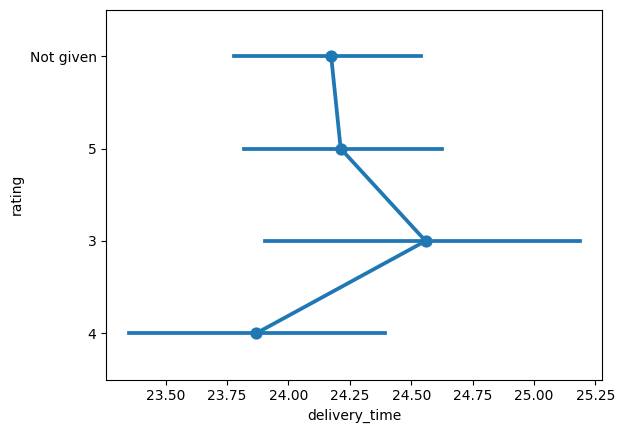

In [ ]:
sns.pointplot(data = df, x = 'delivery_time', y = 'rating')

We see that orders with longer delivery times resulted in a lower (3) rating. Let's look next at food prep time and then total time.

<Axes: xlabel='food_preparation_time', ylabel='rating'>

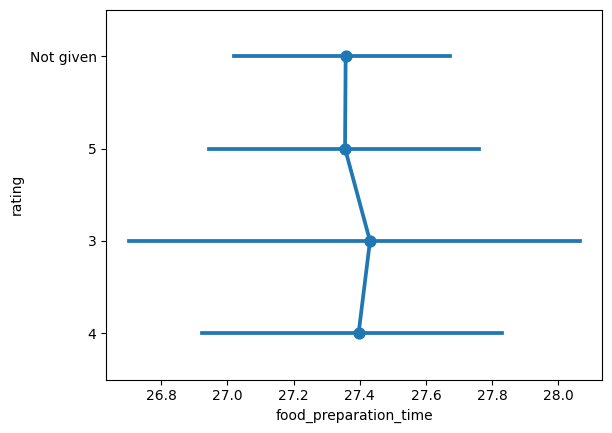

In [ ]:
#pointplot for food preperation time and rating
sns.pointplot(data = df, x = 'food_preparation_time', y = 'rating')

In [ ]:
df['total_time_delivery'] = df['food_preparation_time'] + df['delivery_time']
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time_delivery
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


<Axes: xlabel='total_time_delivery', ylabel='rating'>

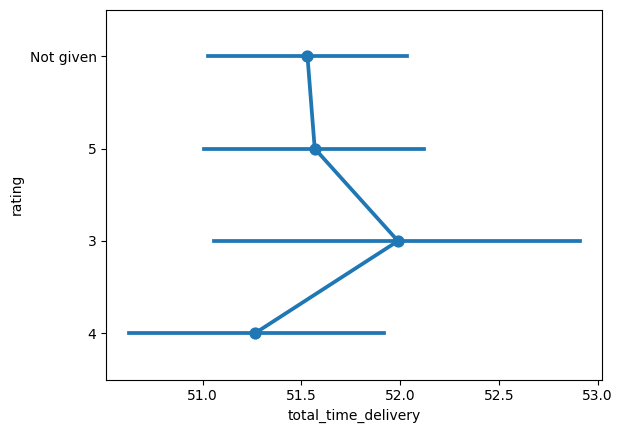

In [ ]:
sns.pointplot(data= df, x = 'total_time_delivery', y = 'rating')

Looking at these graphs, it's possible that time to delivery has an impact on the rating. With longer delivery times (from order to delivery) leading to less satisfaction.

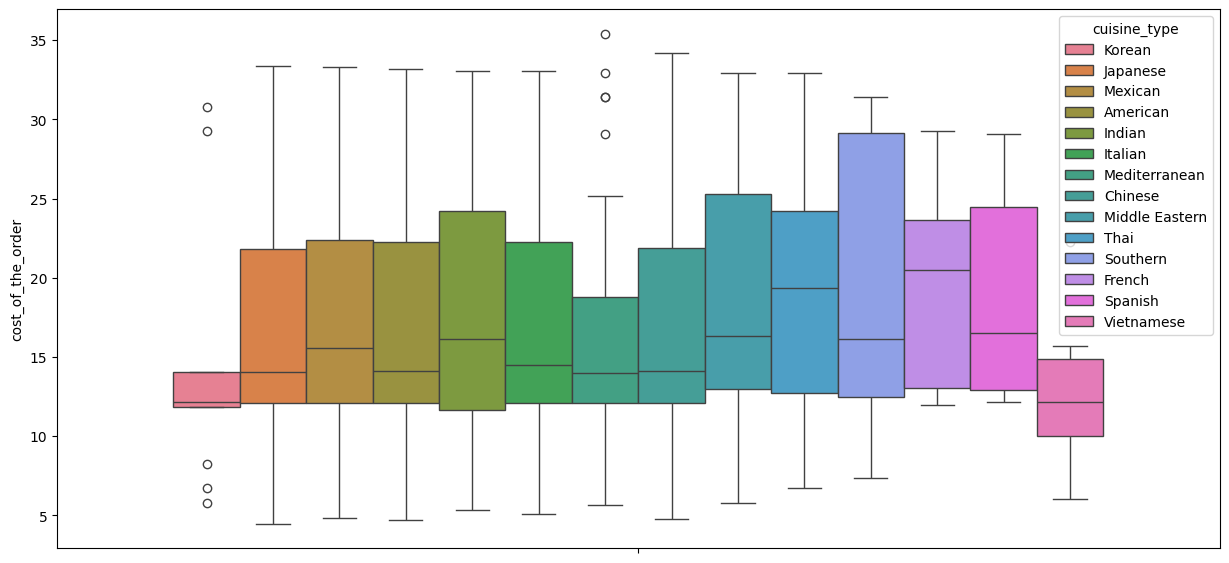

In [ ]:
# Are some cuinines more expensive than others?
plt.figure(figsize=(15,7))
sns.boxplot(data = df, y = 'cost_of_the_order', hue = 'cuisine_type')
plt.show()

Looking at the boxplot, the cost of the order does seem to be impacted perhaps by cuisine type, with the average cost being the lowest for Vietnamese food and the highest for French food. However, we do not have info on the number of items ordered. An order that consists of 1 items versus an order than consists of 5 items will be differ. While the cuisine type may play a role in the cost, we would be more confident making this claim if we had more data, such as number of items, number of entrees/appetizers/drinks etc.

<Axes: ylabel='delivery_time'>

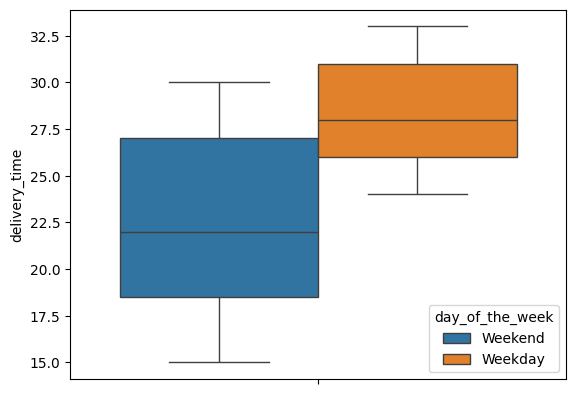

In [ ]:
# Does the day of the week impact the delivery time.
sns.boxplot(data = df, y = 'delivery_time', hue = 'day_of_the_week'  )


Weekdays have longer delivery times. This may be because there are less drivers.

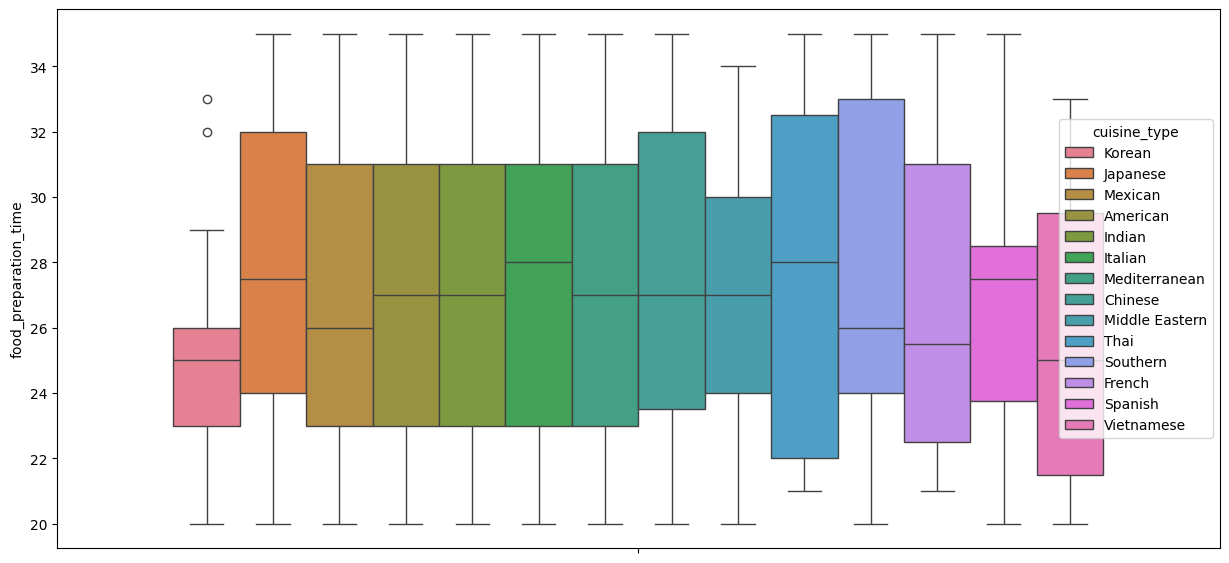

In [ ]:

# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(data = df, y = 'food_preparation_time', hue = 'cuisine_type')
plt.show()

Average food preparation time varies based on the cusine type. However, individual restuarants may create outliers and items in an order may play a role (data we do not have). On average all cuines food preparation times fall between 25 minutes and 28 minutes.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# First find restuarants with more than 50 ratings
# start by creating a new dataframe that drops rating = "Not Given"
df_ratings = df[df['rating'] != 'Not given'].copy()
# df_ratings.head() # need to reindex
df_ratings.reset_index(drop=True, inplace=True)
df_ratings.head()

#convert rating column to an int
df_ratings['rating'] = df_ratings['rating'].astype(int)

df_ratings.dtypes #confirmed ratings is now a float



order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                     int64
food_preparation_time      int64
delivery_time              int64
total_time_delivery        int64
dtype: object

In [ ]:
# Take the above dataframe and create a dataset that has the restaurant name  and rating count
df_rating_cnt = df_ratings.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_cnt.head(10)


,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [ ]:
# return restaurant names that have more than 50 ratings
filtered_restaurants = df_rating_cnt[df_rating_cnt['rating']> 50]
filtered_restaurants.head()
# df_ratings.head(10)

final_rating_df = pd.merge(filtered_restaurants, df_ratings, on=['restaurant_name', 'restaurant_name'])
final_rating_df['restaurant_name'].value_counts(0) # confirming that we only have the restaurants with more than 50 ratings


Shake Shack                  133
The Meatball Shop             84
Blue Ribbon Sushi             73
Blue Ribbon Fried Chicken     64
Name: restaurant_name, dtype: int64

In [ ]:
#return average rating for each restaurant (with more than 50 ratings) by finding the mean rating of each restaurant

# Group the restaurant names with their ratings and find the mean rating of each restaurant
final_rating_df.groupby(['restaurant_name'])['rating_y'].mean().sort_values(ascending = False).reset_index().dropna()

,restaurant_name,rating_y
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


#### Observations: The following restaurants qualify for the promotional offer because they have more than 50 ratings and an average rating greater than 4:

- The Meatball Shop:  84 ratings, 4.5 avg rating
- Blue Rubbon Fried Chicken: 64 ratings, 4.3 avg rating
- Shake Shack:  133 ratings, 4.3 avg rating
- Blue Ribbon Sushi: 73 ratings, 4.2 ratings


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
#first create a new column for revenue using the above
# create a function to determine the revenue based on the above criteria

def revenue(x):
    if x > 20:
        return x * .25 # if cost is greater than 20 then revenue is 25% of the cost
    elif x > 5:
        return x *.15 # if cost is greater than 5 then revenue is 15% of the cost
    else:
        return 0 # else no revenue

df['revenue'] = df['cost_of_the_order'].apply(revenue)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time_delivery,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,1.7385


In [ ]:
#sum the revenue column to get total revenue

total_revenue = df['revenue'].sum()
print('The net revenue is around $',round(total_revenue, 2))



The net revenue is around $ 6166.3


In [ ]:
df.groupby(['cuisine_type'])['revenue'].sum()

cuisine_type
American          1878.2740
Chinese            690.0405
French              76.1925
Indian             246.9940
Italian            966.8845
Japanese          1478.2445
Korean              33.3030
Mediterranean      136.3280
Mexican            256.6930
Middle Eastern     193.5535
Southern            68.7535
Spanish             47.2365
Thai                78.0525
Vietnamese          15.7530
Name: revenue, dtype: float64

In [ ]:
df.groupby(['day_of_the_week'])['revenue'].sum()

day_of_the_week
Weekday    1754.3345
Weekend    4411.9685
Name: revenue, dtype: float64

#### Observations: Net revenue is $6166.30. American and Japanese restuarants brought in the most revenue. Weekends bring in significantly more revenue than weekdays.


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#create new column for total time to deliver as a sum of the time it takes to prep the food and to deliver the meal
df['total_time_to_deliver'] = df['food_preparation_time'] + df['delivery_time']

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,total_time_delivery,revenue,total_time_to_deliver
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45,7.6875,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48,1.8120,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,1.8345,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,7.3000,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,1.7385,49


In [ ]:
(df['total_time_to_deliver'] > 60).sum()/df.shape[0] *100 #number of orders that took more than 60 mins divided by count of all orders

10.537407797681771

#### Observations: about 11% of all orders take more than 60 minutes from the time the order is placed to the time it is delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.groupby('day_of_the_week')['delivery_time'].mean() # find the mean for weekdays and weekends

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

<Axes: ylabel='delivery_time'>

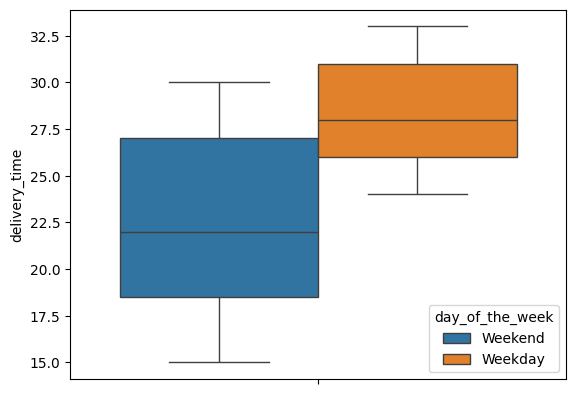

In [ ]:
# we can also plot this with boxplot

sns.boxplot(data = df, y = 'delivery_time', hue = 'day_of_the_week')

#### Observations: The average delivery time on weekends is about 22.4 minutes while the average delivery time on weekdays is about 28.3. Weekday delivery times are longer on average than weekend. This may be because there are more cars available to deliver on the weekend than on weekdays since many people may choose to only deliver during weekends or times that aren't holding another job.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [ ]:
df.groupby(['cuisine_type'])['rating'].value_counts(normalize = True)

cuisine_type    rating   
American        Not given    0.369863
                5            0.297945
                4            0.222603
                3            0.109589
Chinese         Not given    0.381395
                5            0.320930
                4            0.186047
                3            0.111628
French          Not given    0.444444
                5            0.277778
                4            0.166667
                3            0.111111
Indian          5            0.438356
                Not given    0.315068
                4            0.178082
                3            0.068493
Italian         Not given    0.422819
                5            0.302013
                4            0.181208
                3            0.093960
Japanese        Not given    0.419149
                5            0.302128
                4            0.193617
                3            0.085106
Korean          4            0.307692
                Not give

### Conclusions:
*  The majority of orders occur on weekends. Weekends also have on average shorter total time to delivery. Keeping weekend wait times down is important. This is likely a result of more drivers during the weekend. Keeping an eye on inventory of drivers during busy periods is important to keeping this trend.

* Some cuisines do not make up large numbers of orders but they do get high ratings. Examples of this are Indian and Mediterranean food. This suggests that those ordering from these restaurants have good experience. Highlighting restaurants in these cuisine types may provide a new positive experience for users.

* American and Japanese restaurants generate the highest revenue. This is driven by the number of orders and higher priced orders.

* Many orders (about 40%) did not leave a rating. This leaves us with a gap in understanding when poor experiences occurred and how to reduce those experiences.

### Recommendations:

*  Consider collecting more data for better analysis. Recommended data points to include:
  - Number of items in an order
  - Number of entrees
  - Number of appertizers
  - Number of other items (drinks, desserts etc)
  - time of the day
  - Date of the order (allows us to study seasonality)
  - Delivery vehicle type (car/bicycle/scooter etc)
  - city/state of delivery (helps us understand preference by locale)
  - driver id (is there a few drivers that are impacting the delivery times?)

* A/B test new user experiences for collecting ratings. About 40% of orders were not rated. Decreasing instances of users not rating their order will result in better understanding of how restaurants/drivers/cuisine types rate and where it may be best to cut some experiences from the app.

* Continue attracting drivers for weekends. More orders are occuring on the weekend. Keeping driver availability is important.

* Continue to attract new American and Japanese restaurants to join the app to continue improving availability of high revenue cuisines. This may be impacted by location, so understanding the most profitable cuisines in a given location will help you attract the right restaurants.

* Find ways to bring the total time to delivery down. Or use these data points to set a reasonable expectation prior to the user placing their order. This may result in higher ratings and better experiences.




---